# import librabries

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Load dataset

In [41]:
df = pd.read_csv('monthlyMilkProduction.csv',index_col='Date',parse_dates=True)


In [42]:
df.head()


,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


<AxesSubplot:xlabel='Date'>

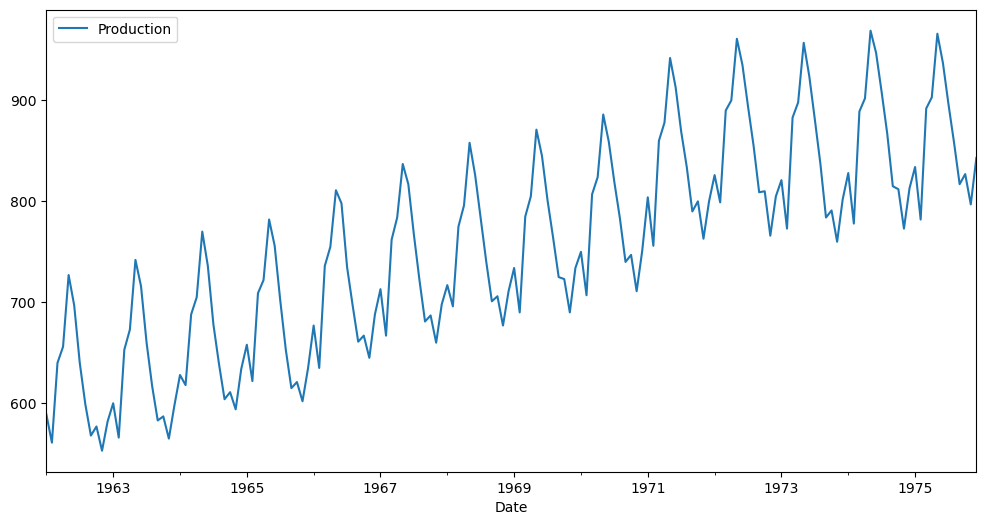

In [43]:
df.plot(figsize=(12,6))


# Decompose

In [45]:
from statsmodels.tsa.seasonal import seasonal_decompose


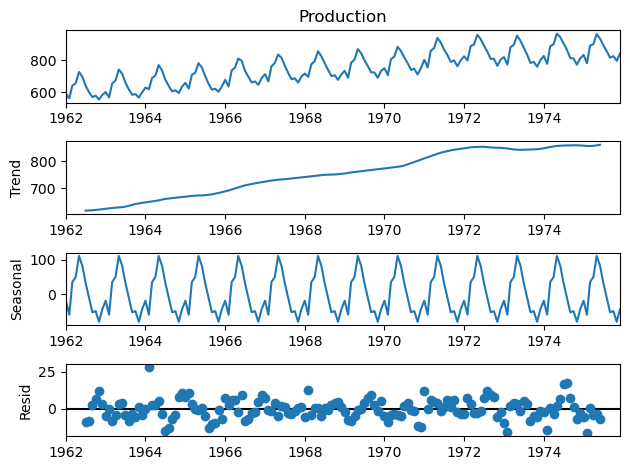

In [46]:
results = seasonal_decompose(df['Production'])
results.plot();

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 to 1975-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Production  168 non-null    int64
dtypes: int64(1)
memory usage: 2.6 KB


In [48]:
# total no. of rows are 168 in that using 156 rows for training purpose and remaining 12 rows for testing purpose

In [49]:
train = df.iloc[:156]
test = df.iloc[156:]


# Scaling

In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [52]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)


In [53]:
scaled_train[:10]


array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231]])

In [54]:
scaled_train.shape

(156, 1)

In [55]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator


In [56]:
# define generator
n_input = 2
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)
# number of samples
print('Samples: %d' % len(generator))
# print each sample
for i in range(len(generator)):
 x, y = generator[i]
 print('%s => %s' % (x, y))


Samples: 154
[[[0.08653846]
  [0.01923077]]] => [[0.20913462]]
[[[0.01923077]
  [0.20913462]]] => [[0.24759615]]
[[[0.20913462]
  [0.24759615]]] => [[0.41826923]]
[[[0.24759615]
  [0.41826923]]] => [[0.34615385]]
[[[0.41826923]
  [0.34615385]]] => [[0.20913462]]
[[[0.34615385]
  [0.20913462]]] => [[0.11057692]]
[[[0.20913462]
  [0.11057692]]] => [[0.03605769]]
[[[0.11057692]
  [0.03605769]]] => [[0.05769231]]
[[[0.03605769]
  [0.05769231]]] => [[0.]]
[[[0.05769231]
  [0.        ]]] => [[0.06971154]]
[[[0.        ]
  [0.06971154]]] => [[0.11298077]]
[[[0.06971154]
  [0.11298077]]] => [[0.03125]]
[[[0.11298077]
  [0.03125   ]]] => [[0.24038462]]
[[[0.03125   ]
  [0.24038462]]] => [[0.28846154]]
[[[0.24038462]
  [0.28846154]]] => [[0.45432692]]
[[[0.28846154]
  [0.45432692]]] => [[0.39182692]]
[[[0.45432692]
  [0.39182692]]] => [[0.25721154]]
[[[0.39182692]
  [0.25721154]]] => [[0.15384615]]
[[[0.25721154]
  [0.15384615]]] => [[0.07211538]]
[[[0.15384615]
  [0.07211538]]] => [[0.08173077]

In [57]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')


Given the Array: 
[0.08653846 0.01923077]
Predict this y: 
 [[0.20913462]]


In [58]:
X.shape


(1, 2, 1)

In [59]:
# define generator
n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense


In [61]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [62]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [63]:
# fit model
model.fit(generator,epochs=50)
  

Epoch 1/50
144/144 [==============================] - 9s 19ms/step - loss: 0.0419
Epoch 2/50
144/144 [==============================] - 2s 12ms/step - loss: 0.0197
Epoch 3/50
144/144 [==============================] - 2s 12ms/step - loss: 0.0126
Epoch 4/50
144/144 [==============================] - 2s 12ms/step - loss: 0.0080
Epoch 5/50
144/144 [==============================] - 2s 12ms/step - loss: 0.0070
Epoch 6/50
144/144 [==============================] - 2s 13ms/step - loss: 0.0099
Epoch 7/50
144/144 [==============================] - 2s 14ms/step - loss: 0.0061
Epoch 8/50
144/144 [==============================] - 2s 12ms/step - loss: 0.0046
Epoch 9/50
144/144 [==============================] - 2s 12ms/step - loss: 0.0038
Epoch 10/50
144/144 [==============================] - 2s 14ms/step - loss: 0.0038
Epoch 11/50
144/144 [==============================] - 3s 17ms/step - loss: 0.0039
Epoch 12/50
144/144 [==============================] - 2s 14ms/step - loss: 0.0036
Epoch 13/50
1

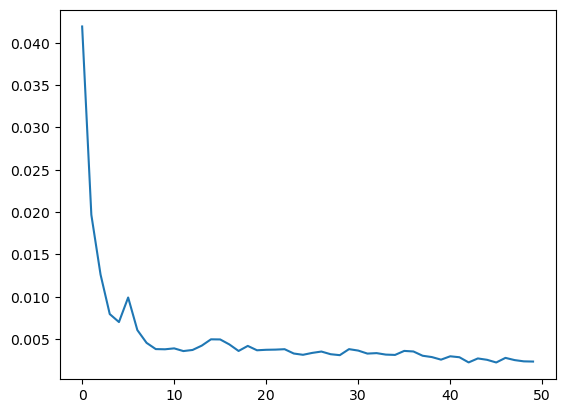

In [64]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)


In [72]:
last_train_batch = scaled_train[-12:]
 

In [73]:
last_train_batch

array([[0.66105769],
       [0.54086538],
       [0.80769231],
       [0.83894231],
       [1.        ],
       [0.94711538],
       [0.85336538],
       [0.75480769],
       [0.62980769],
       [0.62259615],
       [0.52884615],
       [0.625     ]])

In [74]:
last_train_batch.shape

(12, 1)

In [75]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))


In [76]:
last_train_batch

array([[[0.66105769],
        [0.54086538],
        [0.80769231],
        [0.83894231],
        [1.        ],
        [0.94711538],
        [0.85336538],
        [0.75480769],
        [0.62980769],
        [0.62259615],
        [0.52884615],
        [0.625     ]]])

In [77]:
last_train_batch.shape

(1, 12, 1)

In [69]:
model.predict(last_train_batch)


1/1 [==============================] - 1s 881ms/step


array([[0.6065168]], dtype=float32)

In [70]:
scaled_test[0]


array([0.67548077])

In [75]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)


1/1 [==============================] - 0s 67ms/step


In [76]:
test_predictions


[array([0.6065168], dtype=float32),
 array([0.6240394], dtype=float32),
 array([0.7698956], dtype=float32),
 array([0.8581286], dtype=float32),
 array([0.95068073], dtype=float32),
 array([0.9329949], dtype=float32),
 array([0.86284196], dtype=float32),
 array([0.7598599], dtype=float32),
 array([0.6610776], dtype=float32),
 array([0.6069716], dtype=float32),
 array([0.5668412], dtype=float32),
 array([0.5946621], dtype=float32)]

In [77]:
test.head()


,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966


In [78]:
true_predictions = scaler.inverse_transform(test_predictions)


In [79]:
test['Predictions'] = true_predictions


<AxesSubplot:xlabel='Date'>

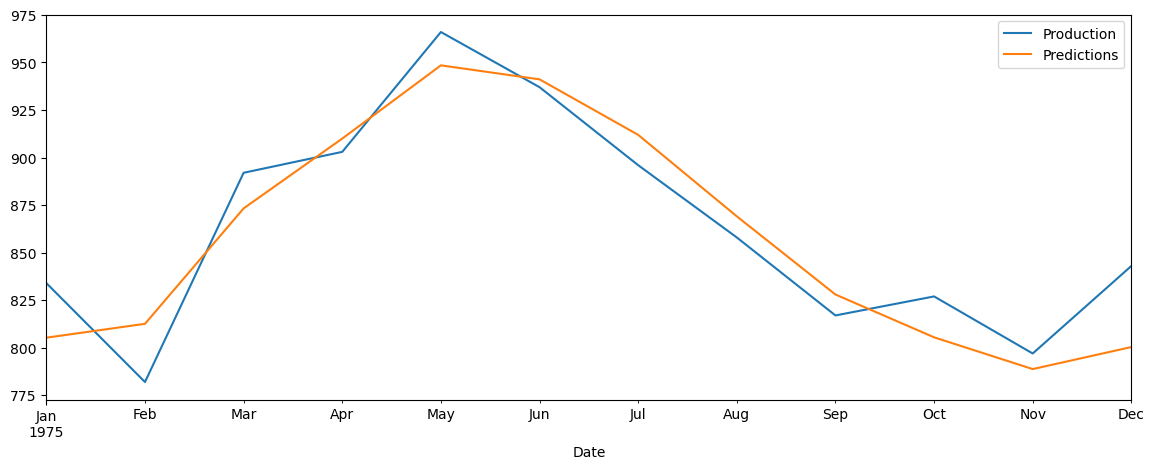

In [80]:
test.plot(figsize=(14,5))


In [81]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Production'],test['Predictions']))
print(rmse)


21.06952414921489
